In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("./DATA.csv")


In [3]:
df.head()

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         36 non-null     object 
 1   Model       36 non-null     object 
 2   Volume      36 non-null     int64  
 3   Weight      36 non-null     int64  
 4   CO2         36 non-null     int64  
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB


In [5]:
df.describe()

,Volume,Weight,CO2,Unnamed: 5
count,36.000000,36.000000,36.000000,0.0
mean,1611.111111,1292.277778,102.027778,NaN
std,388.975047,242.123889,7.454571,NaN
min,900.000000,790.000000,90.000000,NaN
25%,1475.000000,1117.250000,97.750000,NaN
50%,1600.000000,1329.000000,99.000000,NaN
75%,2000.000000,1418.250000,105.000000,NaN
max,2500.000000,1746.000000,120.000000,NaN


In [6]:
print("Dataset Length : ",len(df))
print("Dataset shape : ",df.shape)

Dataset Length :  36
Dataset shape :  (36, 6)


In [7]:
df.isna().sum()

Car            0
Model          0
Volume         0
Weight         0
CO2            0
Unnamed: 5    36
dtype: int64

In [8]:
df = df.drop('Unnamed: 5',axis='columns')

In [9]:
df.isna().sum()

Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64

In [10]:
df.isnull().sum()

Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [39]:

fe = ['Car','Model','Volume','Weight','CO2']

In [55]:
df_fe = df[fe]
df_fe.head()

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [62]:
x = df_fe.iloc[: , :-1]
y = df_fe.iloc[: , -1]

In [63]:
x.head()

,Car,Model,Volume,Weight
0,Toyota,Aygo,1000,790
1,Mitsubishi,Space Star,1200,1160
2,Skoda,Citigo,1000,929
3,Fiat,500,900,865
4,Mini,Cooper,1500,1140


In [64]:
from sklearn.preprocessing import LabelEncoder

lc_car = LabelEncoder()
lc_model = LabelEncoder()

In [65]:
x['Car'] = lc_car.fit_transform(x['Car'])
x['Model'] = lc_model.fit_transform(x['Model'])


x

,Car,Model,Volume,Weight
0,14,10,1000,790
1,10,29,1200,1160
2,12,14,1000,929
3,2,4,900,865
4,9,16,1500,1140
5,15,31,1000,929
6,12,18,1400,1109
7,8,5,1500,1365
8,3,19,1500,1112
9,0,6,1600,1150


In [66]:
y.head()

0     99
1     95
2     95
3     90
4    105
Name: CO2, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20)

In [70]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()



In [72]:
model.fit(x_train,y_train)

LinearRegression()

In [73]:
y_train_predict = model.predict(x_train)
y_train_predict

array([109.54482444, 102.66589958, 100.57839933,  97.76482818,
       103.91861776,  99.74131878, 103.47501589,  99.61530521,
        97.69432997, 106.26131693,  99.89598183, 108.33918033,
        92.63349867,  93.81362005,  98.47923427, 106.32234887,
       100.74832486, 103.89305434,  98.00567218, 106.20134751,
       106.80161127, 112.13577539, 100.58457026, 103.80444383,
       114.08148027])

In [76]:
y_test_predict = model.predict(x_test)
y_test_predict

array([100.03753738, 104.43767514, 100.77129844,  99.81734871,
        95.89577417,  94.60114177, 108.18821381, 104.95038796,
        89.25852423,  98.00636315, 104.80476046])

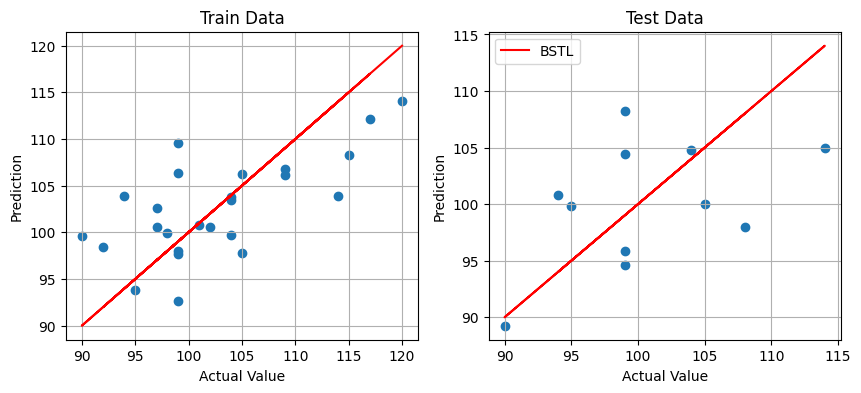

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(y_train,y_train_predict)
plt.plot(y_train,y_train,color="red",label="BSTL")
plt.xlabel('Actual Value')
plt.ylabel('Prediction')
plt.title('Train Data')
plt.grid()

plt.subplot(122)
plt.scatter(y_test,y_test_predict)
plt.plot(y_test,y_test,color="red",label="BSTL")
plt.xlabel('Actual Value')
plt.ylabel('Prediction')
plt.title('Test Data')
plt.grid()
plt.legend()
plt.show()




In [80]:
model.coef_

array([0.11144028, 0.21275808, 0.01058968, 0.003971  ])

In [81]:
model.intercept_


75.2189803894281

In [87]:
test = pd.DataFrame({'Acutal Value ' : y_train , "predict value : ":y_train_predict})
test

,Acutal Value,predict value :
24,99,109.544824
14,97,102.665900
25,102,100.578399
5,105,97.764828
29,114,103.918618
32,104,99.741319
18,104,103.475016
6,90,99.615305
16,99,97.694330
19,105,106.261317
